# Tugas Besar Analisa Data - Model Regresi Bertahap
---
**Kelompok:**
1. Aditya Aulia Rahman (1305220005)
2. Izzulhaq Mahardika (1305220010)
3. Valentino Fredrick Albert Mamesah (1305223104)
---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Exploration

In [ ]:
# Memuat dataset
df = pd.read_excel('factbook_data.xlsx')
df.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,377.835,9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00",538800000000,3745000000000,"$29,400.00",...,81.15,1,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,357.021,8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00",893300000000,2362000000000,"$28,700.00",...,78.65,1.5,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00",113000000000,310200000000,"$12,000.00",...,75.46,10,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00",162500000000,1408000000000,"$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,41.29,9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00",130700000000,251900000000,"$33,800.00",...,80.39,1,"3,093,000,000.00",290.4,"7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4


In [ ]:
# Menampilkan info jumlah baris, jumlah kolom, dan tipe data setiap atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               149 non-null    object 
 1   Area                                  149 non-null    object 
 2   Birth rate                            149 non-null    float64
 3   Current account balance               149 non-null    object 
 4   Death rate                            149 non-null    float64
 5   Electricity consumption               149 non-null    object 
 6   Electricity production                149 non-null    object 
 7   Exports                               149 non-null    int64  
 8   GDP                                   149 non-null    int64  
 9   GDP per capita                        149 non-null    object 
 10  GDP real growth rate                  149 non-null    float64
 11  Highways           

**Deskripsi Data**

---

Dataset Factbook merupakan kumpulan data yang memuat informasi tentang 149 negara. Data ini mencakup berbagai indikator ekonomi, sosial, dan demografis, termasuk tetapi tidak terbatas pada jumlah ekspor dan impor, investasi, GDP (Gross Domestic Product), tingkat pengangguran, dan sejumlah variabel lainnya.

Setiap negara dalam dataset ini memiliki entri yang mencatat nilai-nilai variabel-variabel ini. Informasi tersebut bisa digunakan untuk menganalisis perbandingan antar negara, melacak tren ekonomi global, serta memahami kondisi sosial dan demografis di berbagai negara.

In [ ]:
df.columns.tolist()

['Country',
 'Area',
 'Birth rate',
 'Current account balance ',
 'Death rate',
 'Electricity consumption',
 'Electricity production ',
 'Exports ',
 'GDP ',
 'GDP per capita ',
 'GDP real growth rate',
 'Highways ',
 'Imports ',
 'Industrial production growth rate',
 'Infant mortality rate',
 'Inflation rate ',
 ' Internet users ',
 'Investment',
 'Labor force ',
 'Life expectancy at birth',
 'Military expenditures',
 'Natural gas consumption ',
 'Oil consumption ',
 'Population ',
 'Public debt',
 'Railways',
 'Reserves of foreign exchange & gold ',
 'Total fertility rate',
 'Unemployment rate']

**Keterangan tugas besar**

---

Pada tugas besar analisa data berikut, kami akan menggunakan beberapa atribut yang akan dijadikan variabel dependen dan independen untuk membuat model regresi.

*   Variabel dependen
1. GDP (Y)

*   Variabel independen
1. Export (X1): Jumlah ekspor suatu negara dalam USD
2. Import (X2): Jumlah impor suatu negara dalam USD
3. Industrial production growth rate (X3): Persentase tingkat pertumbuhan produksi industri dalam satu tahun
4. Investment (X4): Total nilai investasi suatu negara dalam USD
5. Unemployment rate  (X5): Persentase angka pengangguran populasi suatu negara

Maka dari itu kami langsung mengeliminasi semua kolom terkecuali kolom dengan variabel independen dan dependen

In [ ]:
# Mengambil data GDP, Export, Imports, Investment, Industrial production growth, dan Unemployment rate
df = df[['GDP ', 'Exports ', 'Imports ', 'Investment', 'Industrial production growth rate', 'Unemployment rate']]
df.head()

,GDP,Exports,Imports,Investment,Industrial production growth rate,Unemployment rate
0,3745000000000,538800000000,401800000000,24,6.6,4.7
1,2362000000000,893300000000,716700000000,17.6,2.2,10.6
2,310200000000,113000000000,36210000000,17.2,2.8,25
3,1408000000000,162500000000,92910000000,19.1,6.4,8.3
4,251900000000,130700000000,121100000000,20.4,4.7,3.4


In [ ]:
print(f"Nilai maksimum GDP: {df['GDP '].max()}")
print(f"Nilai minimum GDP: {df['GDP '].min()}")


Nilai maksimum GDP: 11750000000000
Nilai minimum GDP: 214000000


In [ ]:
# Cek atribut dengan nilai kosong
df.isna().sum()

GDP                                  0
Exports                              0
Imports                              0
Investment                           0
Industrial production growth rate    0
Unemployment rate                    0
dtype: int64

In [ ]:
# Mengisi baris string kosong dengan nilai NaN
df['Investment'] = df['Investment'].replace(' ', np.nan)
df['Unemployment rate'] = df['Unemployment rate'].replace(' ', np.nan)
df['Industrial production growth rate'] = df['Industrial production growth rate'].replace(' ', np.nan)

In [ ]:
# Mengubah tipe data object menjadi float
df[['Investment', 'Industrial production growth rate', 'Unemployment rate']] = df[['Investment', 'Industrial production growth rate', 'Unemployment rate']].astype(float)

In [ ]:
# Menampilkan kembali informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GDP                                149 non-null    int64  
 1   Exports                            149 non-null    int64  
 2   Imports                            149 non-null    int64  
 3   Investment                         144 non-null    float64
 4   Industrial production growth rate  134 non-null    float64
 5   Unemployment rate                  127 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 7.1 KB


**Memeriksa missing value**

---

Mengulangi periksa missing value setelah dilakukan penggantian string kosong dan perbaikan tipe data.

Untuk atribut Investment, Industrial production growth, dan Unemployment rate ditemukan missing value, sehingga perlu dilakukan penanganan.

In [ ]:
# Menampilkan jumlah baris kosong dan duplikat dari setiap atribut
print(df.isna().sum())
print('duplicated', df.duplicated().sum())

GDP                                   0
Exports                               0
Imports                               0
Investment                            5
Industrial production growth rate    15
Unemployment rate                    22
dtype: int64
duplicated 0


Baris dengan missing value diisi dengan nilai rata-rata karena data tersebut bersifat numerik, sehingga pengisian dengan nilai rata-rata menjadi pilihan yang paling sesuai.

In [ ]:
# Mengisi baris kosong dengan nilai rata-rata
df.fillna(df.mean(), inplace = True)

Mengganti nama kolom menjadi Y untuk variabel dependen (GDP) dan x1 ... x5 untuk variabel independen (Export, Import, Industrial production growth rate, Investment, Unemployment rate). Hal ini dilakukan agar memperjelas makna dari masing-masing atribut.

In [ ]:
df = df[['Exports ', 'Imports ', 'Industrial production growth rate', 'Investment', 'Unemployment rate', 'GDP ']]
df = df.rename(columns={'Exports ': 'x1', 'Imports ': 'x2', 'Industrial production growth rate': 'x3', 'Investment' : 'x4', 'Unemployment rate': 'x5', 'GDP ': 'Y'})
df.head()

,x1,x2,x3,x4,x5,Y
0,538800000000,401800000000,6.6,24.0,4.7,3745000000000
1,893300000000,716700000000,2.2,17.6,10.6,2362000000000
2,113000000000,36210000000,2.8,17.2,25.0,310200000000
3,162500000000,92910000000,6.4,19.1,8.3,1408000000000
4,130700000000,121100000000,4.7,20.4,3.4,251900000000


**Korelasi**


---


Tahap ini bertujuan untuk mengevaluasi apakah terdapat variabel independen yang memiliki korelasi tinggi dengan variabel independen lainnya. Selain itu, dengan menganalisis korelasi antara variabel-variabel tersebut, kita dapat mengukur sejauh mana setiap variabel independen mempengaruhi perubahan pada variabel dependen dalam model regresi yang akan dikembangkan.

In [ ]:
# Menghitung korelasi variable independen terhadap variable dependen (Y)
df.corr()['Y']

x1    0.774902
x2    0.893074
x3    0.031218
x4    0.049844
x5   -0.154492
Y     1.000000
Name: Y, dtype: float64

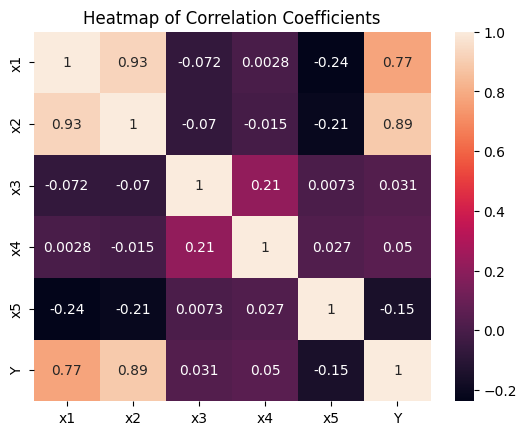

In [ ]:
# Visualisasi
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title("Heatmap of Correlation Coefficients")
plt.show()

Dapat dilihat bahwa korelasi antara Y dengan x1 dan x2 memiliki korelasi positif kuat, sedangkan variable lain memiliki korelasi tidak signifikan karena mendekati nilai nol

## Data Preparation

**Normalisasi data**


---


Sebelum masuk ke dalam rumusnya, dilakukan normalisasi pada data untuk memastikan setiap variabel memiliki skala yang serupa sehingga tidak ada yg bias atau variabel yang mendominasi variabel lain. Skala yang digunakan pada rentang 1-100.

In [ ]:
# Fungsi min max scaler dengan rentang nilai 1 - 100
def normalisasiMinMax(x):
  scale = (x - x.min()) / (x.max() - x.min())
  return scale * 100 #skala yg kita pakai 1 - 100

for column in df.columns:
  df[column] = normalisasiMinMax(df[column])

df.head()

,x1,x2,x3,x4,x5,Y
0,60.315386,27.220201,38.095238,28.021016,5.907781,31.871100
1,100.000000,48.555482,26.455026,16.812609,14.409222,20.100672
2,12.649071,2.450542,28.042328,16.112084,35.158501,2.638227
3,18.190364,6.292112,37.566138,19.439580,11.095101,11.981376
4,14.630503,8.202057,33.068783,21.716287,4.034582,2.142048


## Model Regresi Linear

Model berikut adalah salah satu metode yang dapat digunakan untuk memodelkan hubungan linear antara variabel dependen dan independen



---



MODEL REGRESI

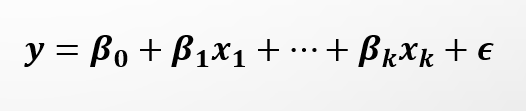

Persamaan di atas adalah model regresi linear, penjelasannya sebagai berikut:

* Y(variabel dependen) merupakan prediksi yang ingin kita cari

* β0 merupakan intercept, β1...βk merupakan koefisien regresi

* x1...xk merupakan variabel independen

* ε adalah eror (tidak perlu masuk ke dalam model/ abaikan)



Model =

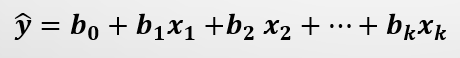

***Persamaan metode kuadrat terkecil regresi liniea berganda***

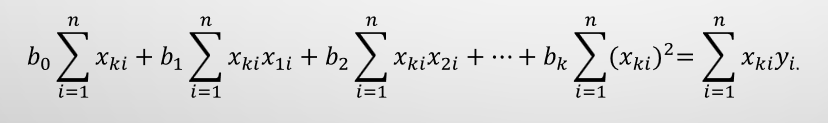

Menggunakan rumus diatas kita dapat menemukan solusi b0...bk untuk model prediksi kita


Cari untuk masing masing
*   sigma xk
*   sigma^2 xk
*   tiap kolom x kolom (x_1,2 ... x_i,j)
*   sigma kolom x Y





***Persamaan regresi linear berganda notasi matriks***

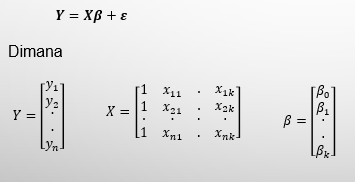

Kami akan menggunakan metode notasi matriks untuk mencari intercept dan beta 1...beta k.

In [ ]:
# matriks x isi kolom pertama pasti 1 karena intercept
X = np.array([[1,df['x1'][i],df['x2'][i],df['x3'][i],df['x4'][i],df['x5'][i]] for i in range(len(df))])

In [ ]:
# matriks Y
Y = np.array(df['Y'])

Menggunakan rumus persamaan dari

image.png

image.png

untuk mencari b

In [ ]:
# X transpose x Y
xTy = X.T.dot(Y)

# X transpose x X pindah ruas sehingga xTx di invers agar mendapatkan nilai b
xTx = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# b =
koefisienBeta = pd.DataFrame(xTx, index = ['bo','b1','b2','b3','b4','b5'], columns = ['Koefisien Regresi'])
koefisienBeta

,Koefisien Regresi
bo,-3.394926
b1,-0.246764
b2,1.198391
b3,0.061135
b4,0.038295
b5,0.011486


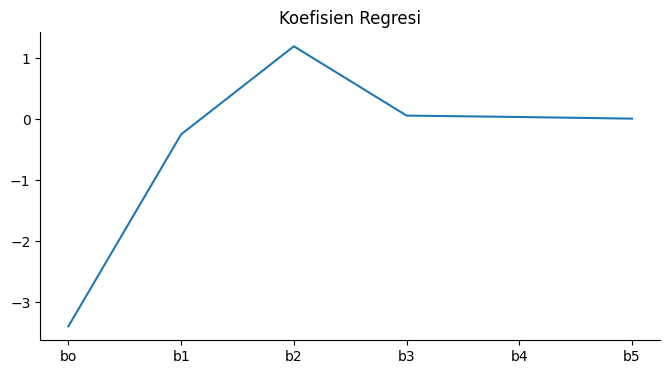

In [ ]:
# Visualisasi Koefisien Regresi

koefisienBeta['Koefisien Regresi'].plot(kind='line', figsize=(8, 4), title='Koefisien Regresi')
plt.gca().spines[['top', 'right']].set_visible(False)

### **Persiapan Membangun Model**

Pada tahap ini, kami akan melakukan persiapan untuk membangun model regresi bertahap. Persiapan ini meliputi beberapa langkah, yaitu:

- Menghitung nilai JKT (Jumlah Kuadrat Total).
- Menghitung nilai JKR
- Menghitung nilai R^2

Jumlah kuadrat galat

image.png

Rumus JKT dan JKR

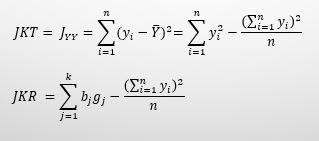

In [ ]:
# Menghitung JKT
JKT = 0
for i in range(len(Y)):
    JKT = (Y[i]**2) + JKT
JKT = JKT - (np.sum(Y)**2) / len(Y)
print('JKT = ',JKT)

JKT =  16124.469067304657


In [ ]:
# Menghitung JKR
JKR = 0
for i in range(len(xTx)):
    JKR = (xTx[i] * xTy[i]) + JKR
JKR = JKR - (np.sum(Y)**2) / len(Y)
print('JKR = ',JKR)

JKR =  13339.67798332371


In [ ]:
R2 = JKR/JKT
print('R^2 = ', R2)

R^2 =  0.827294091212738


Semakin tinggi nilai R^2, semakin baik model dalam menjelaskan variasi data. Sebuah R^2 mendekati 1 berarti model sangat baik dalam menjelaskan data, sedangkan R^2 mendekati 0 berarti model kurang baik.

Sehingga nilai R^2 = 82,57% menunjukkan bahwa model regresi yang digunakan cukup baik dalam menjelaskan variasi data "Y".

**Pemilihan peubah bebas yang masuk ke model regresi**



---



*   Metode pilihan maju = Peubah bebas dimasukkan satu demi satu sampai persamaan regresi yang
memuaskan ditemukan.
*   Metode penyisihan mundur = Semua peubah bebas masuk kedalam model lalu dikeluarkan satu persatu
*   Regresi bertahap = Penyempurnaan dari seleksi maju. Dimana peubah yang telah duluan masuk diuji lagi
apakah tetap dalam model setelah masuknya peubah baru.

Maka dari itu guna mendapatkan hasil yang baik maka digunakan cara **Regresi Bertahap**




**Langkah 1**


---


Persamaan regresi Y terhadap 5 peubah bebas jumlah kuadrat regresi dan masing masing model

In [ ]:
koefisienBeta

,Koefisien Regresi
bo,-3.394926
b1,-0.246764
b2,1.198391
b3,0.061135
b4,0.038295
b5,0.011486


In [ ]:
# fungsi hitung b dan g
def hitung_xTx(X):
  return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

def hitung_xTy(X):
  return X.T.dot(Y)

Fungsi hitung xTx atau b dapat ditulis dalam persamaan matematis berikut:

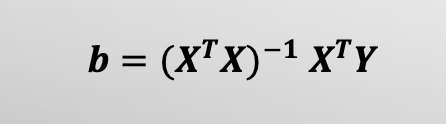



---



Sementara fungsi hitung xTy dapat ditulis dalam persamaan matematis berikut:

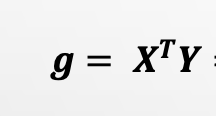

* Persamaan b digunakan untuk menghitung koefisien regresi
𝑏 dalam model regresi linier. Koefisien regresi adalah parameter yang menunjukkan pengaruh setiap variabel independen 𝑋 terhadap variabel dependen 𝑌


* Persamaan g digunakan untuk menghitung komponen penting dalam regresi linier, yaitu hasil perkalian transpose dari matriks fitur 𝑋 dengan vektor respons
𝑌. Hal ini adalah bagian dari persamaan yang digunakan untuk menghitung koefisien regresi 𝑏

In [ ]:
R = []

for var in ['x1', 'x2', 'x3', 'x4', 'x5']:
    X = np.array([[1, df[var][i]] for i in range(len(df))])
    xTx = hitung_xTx(X)
    xTy = hitung_xTy(X)

    JKR = 0
    for i in range(len(xTx)):
        JKR = (xTx[i] * xTy[i]) + JKR
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    #input ke R
    R.append(JKR)

# Konversikan ke dataframe
dfR = pd.DataFrame(R, index=['x1', 'x2', 'x3', 'x4', 'x5'], columns=['Rx(i)'])
dfR

,Rx(i)
x1,9682.315933
x2,12860.575826
x3,15.713934
x4,40.060693
x5,384.856512


In [ ]:
dfR['Rx(i)'].max() # Rx(i) paling besar = x2

12860.575825606753

In [ ]:
# Mengambil nilai maksimum dari kolom 'Rx(i)'
nilai_maksimum = dfR['Rx(i)'].max()

dfR[dfR['Rx(i)'] == nilai_maksimum]

,Rx(i)
x2,12860.575826


untuk mencari nilai f untuk dibandingkan dengan nilai f(derajat kebebasan) menggunakan rumus

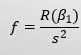

In [ ]:
# cari s^2
X = np.array([[1, df['x2'][i]] for i in range(len(df))])
xTx = hitung_xTx(X)
xTy = hitung_xTy(X)

# masukan JKT dan JKR ke dalam rumus s^2 (regresi bertahap merupakan penyempurnaan dari pilihan maju maka ruus s)
JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(xTx)):
    JKR += xTx[i] * xTy[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 2)
print('s^2 = ',s2)

f = JKR / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 2) # pakai derajad kebebasan


s^2 =  22.20335538570003


bandingkan hasil f yang di dapat dengan f tabel, jika f lebih besar dari pada f table maka peubah xi yang dipilih masuk ke dalam model

In [ ]:
# Membandingan dengan nilai f tabel


if f > f_tabel:
    print(f"Karena {f} > {f_tabel}, maka peubah x2 masuk dalam model.")
else:
    print(f"Karena {f} < {f_tabel}, maka peubah x2 tidak masuk dalam model.")

Karena 579.2176723834069 > 3.905498091187382, maka peubah x2 masuk dalam model.


**Langkah 2**

Karena x2 masuk ke dalam model maka peubah yang tersisa yang mengandung x2 yaitu x2xi kecuali xi = x2. tersisa 4 persamaan

In [ ]:
Ri2 = []

for var in ['x1', 'x3', 'x4', 'x5']:
    X = np.array([[1, df['x2'][i], df[var][i]] for i in range(len(df))])
    xTx = hitung_xTx(X)
    xTy = hitung_xTy(X)

    JKR = 0
    for i in range(len(xTx)):
        JKR = (xTx[i] * xTy[i]) + JKR
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    #input ke Ri2
    Ri2.append(JKR - R[0])

# Konversikan ke dataframe
dfR2 = pd.DataFrame(Ri2, index=['x12', 'x32', 'x42', 'x52'], columns=['Rx(i)'])
dfR2

,Rx(i)
x12,3476.667999
x32,3320.120077
x42,3242.380272
x52,3197.350001


In [ ]:
# Mengambil nilai maksimum dari kolom 'Rx(i)'
nilai_maksimum = dfR2['Rx(i)'].max()

dfR2[dfR2['Rx(i)'] == nilai_maksimum]

,Rx(i)
x12,3476.667999


In [ ]:
# Mencari nilai s^2 untuk x12 karena x1 terpilih
X = np.array([[1, df['x2'][i], df['x1'][i]] for i in range(len(df))])
xTx = hitung_xTx(X)
xTy = hitung_xTy(X)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(xTx)):
    JKR += xTx[i] * xTy[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 3)
print('s^2 = ',s2)

f = (JKR-R[1]) / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 3) # pakai derajad kebebasan

s^2 =  20.311542017341832


bandingkan hasil f yang di dapat dengan f tabel, jika f lebih besar dari pada f table maka peubah xi yang dipilih masuk ke dalam model

In [ ]:
# Membandingan dengan nilai f tabel
if f > f_tabel:
    print(f"Karena {f} > {f_tabel}, maka peubah x12 masuk dalam model.")
else:
    print(f"Karena {f} < {f_tabel}, maka peubah x12 tidak masuk dalam model.")

Karena 14.691553546806942 > 3.9059421464318516, maka peubah x12 masuk dalam model.


**Langkah 3**

In [ ]:
Ri12 = []

for var in ['x3', 'x4', 'x5']:
    X = np.array([[1, df['x2'][i], df['x1'][i], df[var][i]] for i in range(len(df))])
    xTx = hitung_xTx(X)
    xTy = hitung_xTy(X)

    JKR = 0
    for i in range(len(xTx)):
        JKR = (xTx[i] * xTy[i]) + JKR
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    #input ke Ri2
    Ri12.append(JKR - (R[0] + Ri2[0]))

# Konversikan ke dataframe
dfR3 = pd.DataFrame(Ri12, index=['x123', 'x124', 'x125'], columns=['Rx(i)'])
dfR3

,Rx(i)
x123,134.066330
x124,76.908453
x125,5.739624


In [ ]:
# Mengambil nilai maksimum dari kolom 'Rx(i)'
nilai_maksimum = dfR3['Rx(i)'].max()

dfR3[dfR3['Rx(i)'] == nilai_maksimum]

,Rx(i)
x123,134.06633


In [ ]:
# Mencari nilai s^2 untuk x12 karena x1 terpilih
X = np.array([[1, df['x2'][i], df['x1'][i], df['x3'][i]] for i in range(len(df))])
xTx = hitung_xTx(X)
xTy = hitung_xTy(X)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(xTx)):
    JKR += xTx[i] * xTy[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 4)
print('s^2 = ',s2)

f = (JKR-Ri12[1]+Ri2[0]) / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 4) # pakai derajad kebebasan

s^2 =  19.527026239418085


In [ ]:
# Membandingan dengan nilai f tabel
if f > f_tabel:
    print(f"Karena {f} > {f_tabel}, maka peubah x123 masuk dalam model.")
else:
    print(f"Karena {f} < {f_tabel}, maka peubah x123 tidak masuk dalam model.")

Karena 854.8567305721716 > 3.906392402723093, maka peubah x123 masuk dalam model.


**Langkah 4**

sisa x4 dan x5

In [ ]:
Ri123 = []

for var in ['x4', 'x5']:
    X = np.array([[1, df['x3'][i], df['x2'][i], df['x1'][i], df[var][i]] for i in range(len(df))])
    xTx = hitung_xTx(X)
    xTy = hitung_xTy(X)

    JKR = 0
    for i in range(len(xTx)):
        JKR = (xTx[i] * xTy[i]) + JKR
    JKR = JKR - (np.sum(Y)**2) / len(Y)

    #input ke Ri2
    Ri123.append(JKR - (R[0] + Ri2[0]+ Ri12[0]))

# Konversikan ke dataframe
dfR4 = pd.DataFrame(Ri123, index=['x1234', 'x1235'], columns=['Rx(i)'])
dfR4

,Rx(i)
x1234,41.321185
x1235,6.303334


In [ ]:
# Mengambil nilai maksimum dari kolom 'Rx(i)'
nilai_maksimum = dfR4['Rx(i)'].max()

dfR4[dfR4['Rx(i)'] == nilai_maksimum]

,Rx(i)
x1234,41.321185


In [ ]:
# Mencari nilai s^2 untuk x12 karena x1 terpilih
X = np.array([[1, df['x4'][i],df['x2'][i], df['x1'][i], df['x3'][i]] for i in range(len(df))])
xTx = hitung_xTx(X)
xTy = hitung_xTy(X)

JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(xTx)):
    JKR += xTx[i] * xTy[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

JKG = JKT - JKR
s2 = JKG / (len(Y) - 5)
print('s^2 = ',s2)

f = (JKR-(R[0]+Ri2[0]+Ri12[0])) / s2
f_tabel = stats.f.isf(0.05, 1, len(Y) - 5) # pakai derajad kebebasan

s^2 =  19.37567791532481


In [ ]:
# Membandingan dengan nilai f tabel
if f > f_tabel:
    print(f"Karena {f} > {f_tabel}, maka peubah x1234 masuk dalam model.")
else:
    print(f"Karena {f} < {f_tabel}, maka peubah x1234 tidak masuk dalam model.")

Karena 2.1326316988458576 < 3.906848990862648, maka peubah x1234 tidak masuk dalam model.




---



# SELESAI

Persamaan regresi
Variabel independen yang masuk ke dalam model adalah x1,x2,x3

In [ ]:
# beta untuk 3 variabel
# xTx = b
X = np.array([[1, df['x2'][i], df['x1'][i], df['x3'][i]] for i in range(len(df))])
xTx = hitung_xTx(X)
xTy = hitung_xTy(X)

dfRegresi = pd.DataFrame(xTx, index=['b0', 'b1', 'b2', 'b3'], columns=['Koefisien Regresi'])
dfRegresi

,Koefisien Regresi
b0,-2.535903
b1,1.193746
b2,-0.246134
b3,0.069391


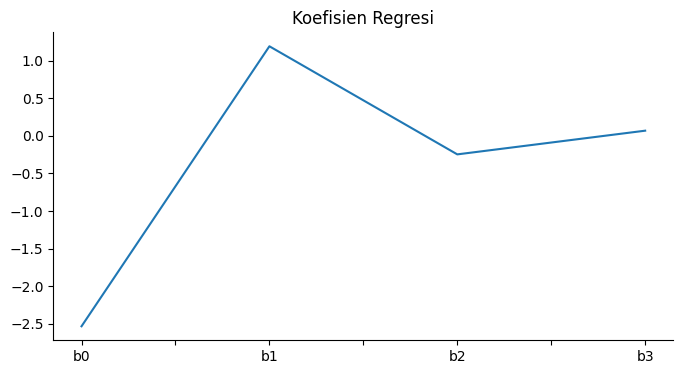

In [ ]:
# Visualisasi
dfRegresi['Koefisien Regresi'].plot(kind='line', figsize=(8, 4), title='Koefisien Regresi')
plt.gca().spines[['top', 'right']].set_visible(False)

R^2 hasil regresi?

In [ ]:
JKT = 0
for i in range(len(Y)):
    JKT += Y[i]**2
JKT = JKT - (np.sum(Y)**2) / len(Y)

JKR = 0
for i in range(len(xTx)):
    JKR += xTx[i] * xTy[i]
JKR = JKR - (np.sum(Y)**2) / len(Y)

R2 = JKR / JKT
print('R^2 = ',R2)

R^2 =  0.8244023544032933


Eror

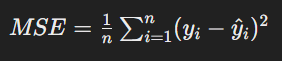

In [ ]:
b = xTx

Y_pred = []
for i in range(len(df)):
    Y_pred.append(b[0] + b[1] * df['x2'][i] + b[2] * df['x1'][i] + b[3] * df['x3'][i])

MSE = np.sum((Y-Y_pred)**2)/ len(Y)
MSE

19.00281076990364

**Skala Data:**

* Nilai Minimum GDP: 214,000,000

* Nilai Maksimum GDP: 11,750,000,000,000

* Rentang Nilai GDP: Selisih antara nilai maksimum dan minimum yaitu:

  Rentang = 11,750,000,000,000 − 214,000,000 = 11,749,786,000,000


---


**Mean Squared Error (MSE) = 19.00281076990364**

MSE sebesar 19.00281076990364 dalam rentang nilai GDP ini sangat kecil dan hampir mendekati nol jika dibandingkan dengan skala GDP yang sangat besar. Nilai MSE ini menunjukkan bahwa model memiliki performa yang sangat baik karena relaitf sangat kecil terhadap nilai GDP yang besar.

<ipython-input-47-d1aaa47b7b40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, label="Y Aktual")
<ipython-input-47-d1aaa47b7b40>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred, label="Y Prediksi")


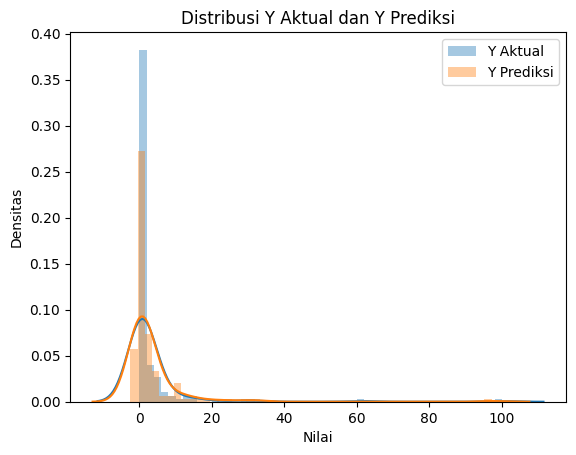

In [ ]:
sns.distplot(Y, label="Y Aktual")
sns.distplot(Y_pred, label="Y Prediksi")
plt.xlabel("Nilai")
plt.ylabel("Densitas")
plt.title("Distribusi Y Aktual dan Y Prediksi")
plt.legend()
plt.show()

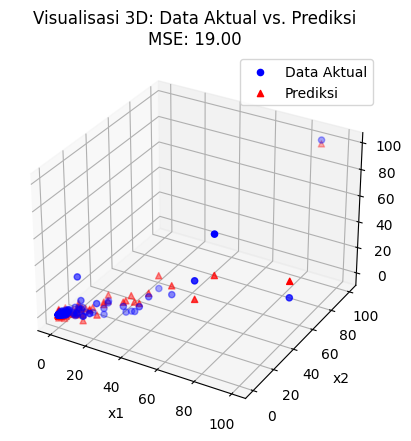

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Ubah kolom Y DataFrame menjadi array NumPy
Y = np.array(df['Y'])

# Persiapkan prediksi Y_pred
Y_pred = []
for i in range(len(df)):
    Y_pred.append(b[0] + b[1] * df['x2'][i] + b[2] * df['x1'][i] + b[3] * df['x3'][i])

# Hitung Mean Squared Error (MSE)
MSE = np.sum((Y - Y_pred)**2) / len(Y)

# Buat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot titik-titik data aktual
ax.scatter(df['x1'], df['x2'], Y, c='blue', label='Data Aktual')

# Plot titik-titik prediksi
ax.scatter(df['x1'], df['x2'], Y_pred, c='red', marker='^', label='Prediksi')

# Label sumbu
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y')

# Tampilkan legenda
ax.legend()

# Judul plot
plt.title(f'Visualisasi 3D: Data Aktual vs. Prediksi\nMSE: {MSE:.2f}')

# Tampilkan plot
plt.show()

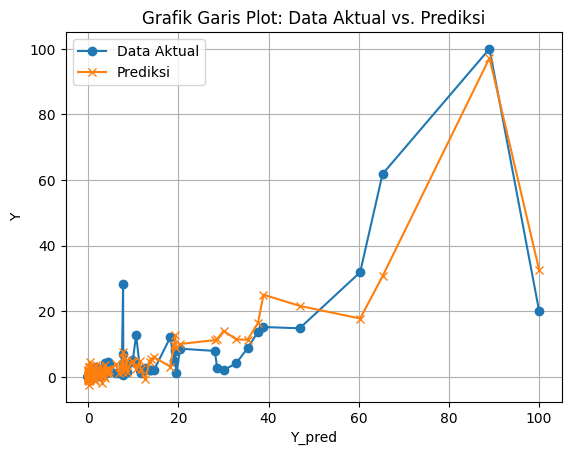

In [ ]:
import matplotlib.pyplot as plt

# Persiapan data untuk plot
x1 = df['x1']
Y = np.array(df['Y'])
Y_pred = np.array(Y_pred)

# Urutkan data berdasarkan nilai x1 (opsional, tergantung pada kebutuhan)
sorted_indices = np.argsort(x1)
x1_sorted = x1[sorted_indices]
Y_sorted = Y[sorted_indices]
Y_pred_sorted = Y_pred[sorted_indices]

plt.plot(x1_sorted, Y_sorted, label='Data Aktual', marker='o')
plt.plot(x1_sorted, Y_pred_sorted, label='Prediksi', marker='x')

# Label sumbu dan judul
plt.xlabel('Y_pred')
plt.ylabel('Y')
plt.title('Grafik Garis Plot: Data Aktual vs. Prediksi')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()


Secara umum, garis oranye (prediksi) mengikuti pola yang sama dengan garis biru (aktual), menunjukkan bahwa model regresi cukup baik dalam memprediksi nilai Y.
Ada beberapa titik di mana prediksi dan nilai aktual sangat dekat, menunjukkan prediksi yang akurat.

Grafik di atas menunjukkan bahwa model regresi yang digunakan memiliki performa yang cukup baik, dengan nilai prediksi yang mendekati nilai aktual untuk sebagian besar titik data. Beberapa deviasi menunjukkan bahwa ada area di mana model dapat diperbaiki, tetapi secara keseluruhan, model berhasil mengikuti pola data aktual dengan baik.